# Epsilon Experiments
This notebook is meant for tests of different epsilon values, and filtering big solution sets.

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Define the subfoldername of the experiment of interest
exp_principles = [ "nfe100000_uwf_001_demand",  "nfe100000_pwf_100_demand", "nfe100000_gini_01_demand"]
# 1:0.1, 2:0.01, 3:0.05, 4:0.05/0.025
exp_none = ["nfe50000_None_1_demand", "nfe50000_None_01_demand", "nfe50000_None_05_demand", "nfe50000_None_025_demand", "nfe50000_None_001_demand"]
experiment_names= exp_principles


In [76]:
# Create an empty dictionary to store grouped DataFrames
grouped_dfs = {
    "None": {},
    "uwf": {},
    "pwf": {},
    "gini": {},
}

for name in experiment_names:
    print(name)
    subfolderpath = f"../outputs/{name}"  
    # Read the CSV file into a DataFrame
    df = pd.read_csv(f"{subfolderpath}/baseline_results_{name}.csv").drop(columns="Unnamed: 0")
    
    # Determine the principle (uwf, pwf, or gini) based on the experiment name
    principle = "None"
    if "uwf" in name:
        principle = "uwf"
    elif "pwf" in name:
        principle = "pwf"
    elif "gini" in name:
        principle = "gini"
        
    # Determine the index for the dataframe within each principle
    if principle:
        if not grouped_dfs[principle]:
            index = str(1)
        else:
            index = str(len(grouped_dfs[principle]) + 1)
        grouped_dfs[principle][index] = df


nfe100000_uwf_001_demand
nfe100000_pwf_100_demand
nfe100000_gini_01_demand


In [77]:
# Creating empty dictionaries to store df_policies and df_objectives for each experiment
df_policies_dict = {}
df_objectives_dict = {}

for principle, experiments in grouped_dfs.items():
    # Initialize dictionaries for policies and objectives within each principle
    df_policies_dict[principle] = {}
    df_objectives_dict[principle] = {}
    
    # Iterate through experiments in the current principle
    for index, df_solutions in experiments.items():
        # Separating columns into df_policies and df_objectives
        df_policies = df_solutions.iloc[:, :-6]  # Contains all columns except the last 6
        df_objectives = df_solutions.iloc[:, -6:]  # Contains the last 6 columns
        
        # Storing df_policies and df_objectives in dictionaries with experiment names as keys
        df_policies_dict[principle][index] = df_policies
        df_objectives_dict[principle][index] = df_objectives

In [78]:
# Displaying shape of each dataframe
for principle, experiments in df_objectives_dict.items():
    print(f"\nPrinciple: {principle}")
    for index, df in experiments.items():
        print(f"Experiment {index}: Shape - {df.shape}")



Principle: None

Principle: uwf
Experiment 1: Shape - (154, 6)

Principle: pwf
Experiment 1: Shape - (209, 6)

Principle: gini
Experiment 1: Shape - (256, 6)


In [79]:
# Concatenate the CV DataFrames into a single DataFrame for visualization
dfs_to_concat = []
non_empty_keys = []

for principle, index in df_objectives_dict.items():
    if len(index) > 0:  # Check if the dictionary is non-empty
        concatenated_df = pd.concat(index.values(), keys=index.keys())
        dfs_to_concat.append(concatenated_df)
        non_empty_keys.append(principle)

df_combined = pd.concat(dfs_to_concat, keys=non_empty_keys, names=['Principle', 'Experiment', None])

# Reset the index and set 'Principle' and 'Experiment' as separate columns
df_combined = df_combined.reset_index(level=[0, 1])

# Rename the columns to reflect 'Principle' and 'Experiment'
df_combined = df_combined.rename(columns={'level_0': 'Principle', 'level_1': 'Experiment'})
df_combined

,Principle,Experiment,egypt_90p_deficit_ratio,egypt_low_had_frequency,sudan_agg_deficit_ratio,sudan_90p_deficit_ratio,ethiopia_agg_deficit_ratio,principle_result
0,uwf,1,0.216935,0.025000,0.387924,0.723584,0.727320,3.843009
1,uwf,1,0.167141,0.045833,0.524357,0.905889,0.959007,3.344479
2,uwf,1,0.168787,0.325000,0.382133,0.892661,0.870995,3.300017
3,uwf,1,0.160727,0.325000,0.549604,0.869624,0.745152,3.293202
4,uwf,1,0.229041,0.045833,0.430290,0.881253,0.718165,3.618857
...,...,...,...,...,...,...,...,...
251,gini,1,0.236072,0.008333,0.426423,0.754036,0.724550,0.561834
252,gini,1,0.154846,0.270833,0.570994,0.790431,0.754010,0.629879
253,gini,1,0.135383,0.679167,0.650251,0.897248,0.736050,0.681818
254,gini,1,0.206204,0.025000,0.598433,0.905561,0.720008,0.553772


In [80]:
# Melt the DataFrame to long format for easier plotting
melted_df = df_combined.melt(id_vars=['Principle', 'Experiment'], var_name='Objective', value_name='Coefficient of Variation')
melted_df

,Principle,Experiment,Objective,Coefficient of Variation
0,uwf,1,egypt_90p_deficit_ratio,0.216935
1,uwf,1,egypt_90p_deficit_ratio,0.167141
2,uwf,1,egypt_90p_deficit_ratio,0.168787
3,uwf,1,egypt_90p_deficit_ratio,0.160727
4,uwf,1,egypt_90p_deficit_ratio,0.229041
...,...,...,...,...
3709,gini,1,principle_result,0.561834
3710,gini,1,principle_result,0.629879
3711,gini,1,principle_result,0.681818
3712,gini,1,principle_result,0.553772


In [81]:
# Get unique Principle values
unique_principles = melted_df['Principle'].unique()

# Define a custom color palette with the same color for each unique Principle value
original_palette = sns.color_palette("Set1", len(unique_principles))
# Double the colors in the palette to match each unique principle value with two different shades
custom_palette = [color for color in original_palette for _ in (0, 1)]
print(custom_palette)

# Create a dictionary to map Principle values to colors
principle_color_map = dict(zip(melted_df[['Principle', 'Experiment']].apply(tuple, axis=1).unique(), custom_palette))
principle_color_map

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745), (0.8941176470588236, 0.10196078431372549, 0.10980392156862745), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.30196078431372547, 0.6862745098039216, 0.2901960784313726)]


{('uwf', '1'): (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 ('pwf', '1'): (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 ('gini', '1'): (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)}

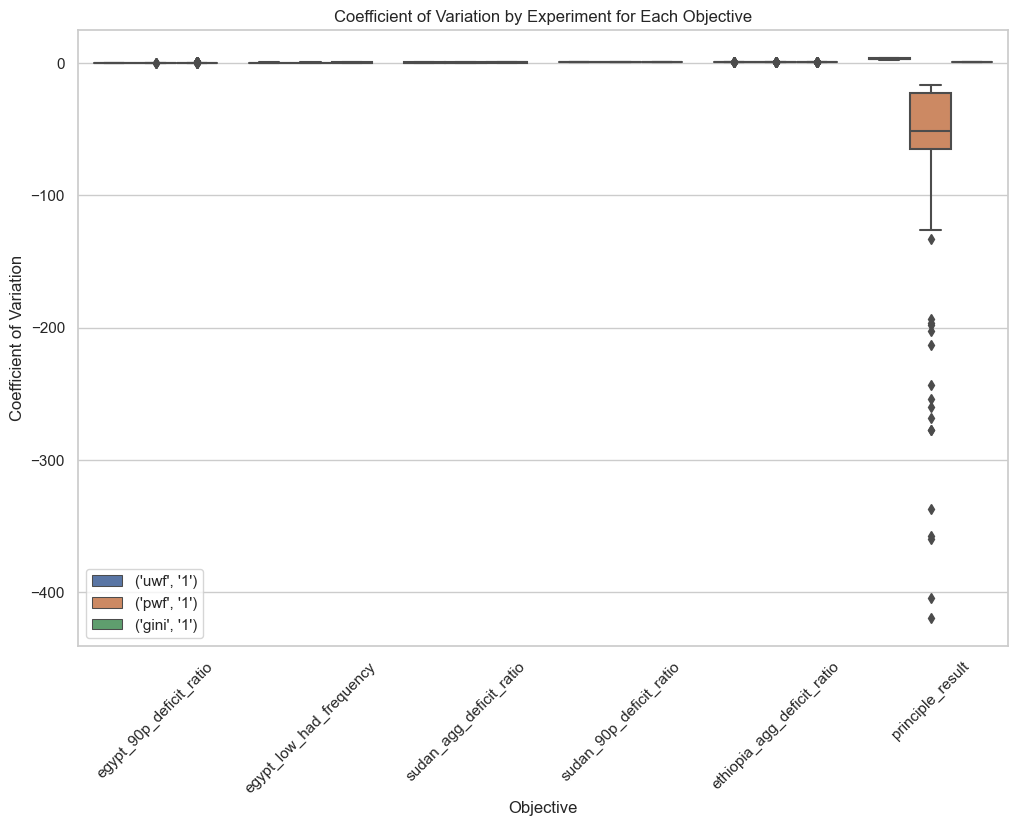

In [82]:
# Create a boxplot using seaborn with 'Objective' on the x-axis, 'Experiment' as individual boxes, and 'Principle' as hue, add if different principles apply palette=principle_color_map
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(x='Objective', y='Coefficient of Variation', hue=melted_df[['Principle', 'Experiment']].apply(tuple, axis=1), data=melted_df)
plt.title('Coefficient of Variation by Experiment for Each Objective')
plt.xlabel('Objective')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45)
plt.show()

In [83]:
def calculate_coefficient_of_variation(dataframe: pd.DataFrame, columns: list):
    """
    Calculate the coefficient of variation for selected columns in the input DataFrame and return a new DataFrame.

    The coefficient of variation (CV) measures the relative variability of a dataset, defined as the ratio
    of the standard deviation to the mean. It provides a standardized measure of dispersion.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names for which to calculate the coefficient of variation.

    Returns:
        pd.DataFrame: A new DataFrame with the selected columns replaced by their respective coefficient of variation.

    """
    df_cv = dataframe.copy()

    # Calculate the standard deviation for selected columns
    std_deviation = df_cv[columns].std()

    # Calculate the mean for selected columns
    mean = df_cv[columns].mean()

    # Calculate the coefficient of variation for selected columns
    df_cv[columns] = (df_cv[columns] - mean) / std_deviation

    return df_cv


In [84]:
# Dictionary to store coefficient of variation DataFrames
df_cv_objectives_dict = {}

# Iterate through the experiments in grouped_dfs and calculate coefficient of variation
for principle, experiments in df_objectives_dict.items():
    # Create a dictionary to store CV results for this principle
    principle_cv_dict = {}
    
    # Iterate through experiments within this principle
    for index, df_objectives in experiments.items():
        # List of columns for which to calculate the coefficient of variation
        columns_to_calculate_cv = df_objectives.columns.tolist()
        
        # Calculate coefficient of variation using the function
        df_cv_objectives = calculate_coefficient_of_variation(df_objectives, columns_to_calculate_cv)
        
        # Store the result in the principle_cv_dict with experiment index as keys
        principle_cv_dict[index] = df_cv_objectives
        
    # Store the principle_cv_dict in the main dictionary with principle names as keys
    df_cv_objectives_dict[principle] = principle_cv_dict


In [85]:
# Displaying shape of each dataframe
for principle, experiments in df_cv_objectives_dict.items():
    print(f"\nPrinciple: {principle}")
    for index, df in experiments.items():
        print(f"Experiment {index}: Shape - {df.shape}")


Principle: None

Principle: uwf
Experiment 1: Shape - (154, 6)

Principle: pwf
Experiment 1: Shape - (209, 6)

Principle: gini
Experiment 1: Shape - (256, 6)


In [86]:
# Concatenate the CV DataFrames into a single DataFrame for visualization
dfs_to_concat = []
non_empty_keys = []

for principle, index in df_cv_objectives_dict.items():
    if len(index) > 0:  # Check if the dictionary is non-empty
        concatenated_df = pd.concat(index.values(), keys=index.keys())
        dfs_to_concat.append(concatenated_df)
        non_empty_keys.append(principle)

df_cv_combined = pd.concat(dfs_to_concat, keys=non_empty_keys, names=['Principle', 'Experiment', None])

# Reset the index and set 'Principle' and 'Experiment' as separate columns
df_cv_combined = df_cv_combined.reset_index(level=[0, 1])

# Rename the columns to reflect 'Principle' and 'Experiment'
df_cv_combined = df_cv_combined.rename(columns={'level_0': 'Principle', 'level_1': 'Experiment'})
df_cv_combined


,Principle,Experiment,egypt_90p_deficit_ratio,egypt_low_had_frequency,sudan_agg_deficit_ratio,sudan_90p_deficit_ratio,ethiopia_agg_deficit_ratio,principle_result
0,uwf,1,1.518830,-1.129904,-1.163524,-1.433848,-0.715535,1.848836
1,uwf,1,-0.397420,-1.036453,0.255940,1.059684,3.420363,-0.181344
2,uwf,1,-0.334082,0.215786,-1.223773,0.878759,1.849227,-0.362411
3,uwf,1,-0.644244,0.215786,0.518615,0.563656,-0.397217,-0.390160
4,uwf,1,1.984718,-1.036453,-0.722740,0.722717,-0.878966,0.936016
...,...,...,...,...,...,...,...,...
251,gini,1,-0.182879,-1.169371,-0.937968,-1.036081,-0.688074,-1.009604
252,gini,1,-0.532991,-0.278253,0.607370,-0.543173,-0.217989,-0.173363
253,gini,1,-0.616887,1.107930,1.454555,0.903488,-0.504561,0.464934
254,gini,1,-0.311621,-1.112792,0.900674,1.016076,-0.760541,-1.108691


In [87]:
# Melt the DataFrame to long format for easier plotting
melted_df = df_cv_combined.melt(id_vars=['Principle', 'Experiment'], var_name='Objective', value_name='Coefficient of Variation')
melted_df

,Principle,Experiment,Objective,Coefficient of Variation
0,uwf,1,egypt_90p_deficit_ratio,1.518830
1,uwf,1,egypt_90p_deficit_ratio,-0.397420
2,uwf,1,egypt_90p_deficit_ratio,-0.334082
3,uwf,1,egypt_90p_deficit_ratio,-0.644244
4,uwf,1,egypt_90p_deficit_ratio,1.984718
...,...,...,...,...
3709,gini,1,principle_result,-1.009604
3710,gini,1,principle_result,-0.173363
3711,gini,1,principle_result,0.464934
3712,gini,1,principle_result,-1.108691


In [88]:
# Get unique Principle values
unique_principles = melted_df['Principle'].unique()

# Define a custom color palette with the same color for each unique Principle value
original_palette = sns.color_palette("Set1", len(unique_principles))
# Double the colors in the palette to match each unique principle value with two different shades
custom_palette = [color for color in original_palette for _ in (0, 1)]
print(custom_palette)

# Create a dictionary to map Principle values to colors
principle_color_map = dict(zip(melted_df[['Principle', 'Experiment']].apply(tuple, axis=1).unique(), custom_palette))
principle_color_map

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745), (0.8941176470588236, 0.10196078431372549, 0.10980392156862745), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.30196078431372547, 0.6862745098039216, 0.2901960784313726)]


{('uwf', '1'): (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 ('pwf', '1'): (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 ('gini', '1'): (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)}

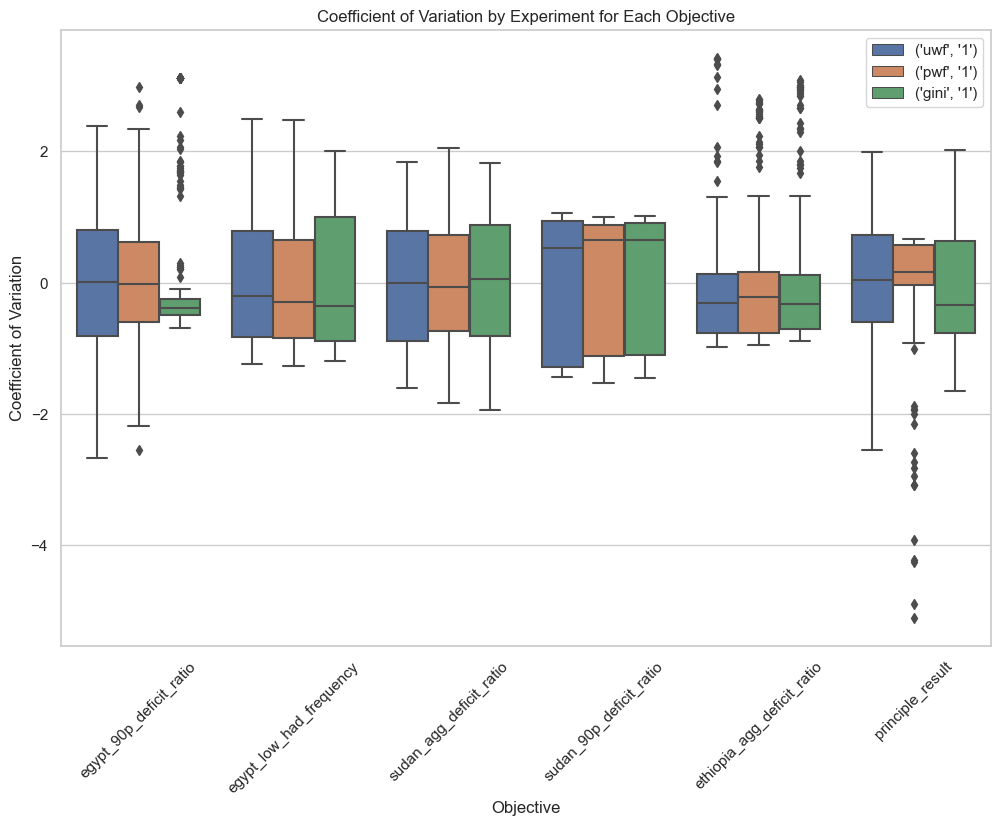

In [89]:
# Create a boxplot using seaborn with 'Objective' on the x-axis, 'Experiment' as individual boxes, and 'Principle' as hue, add if different principles apply palette=principle_color_map
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(x='Objective', y='Coefficient of Variation', hue=melted_df[['Principle', 'Experiment']].apply(tuple, axis=1), data=melted_df)
plt.title('Coefficient of Variation by Experiment for Each Objective')
plt.xlabel('Objective')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45)
plt.show()

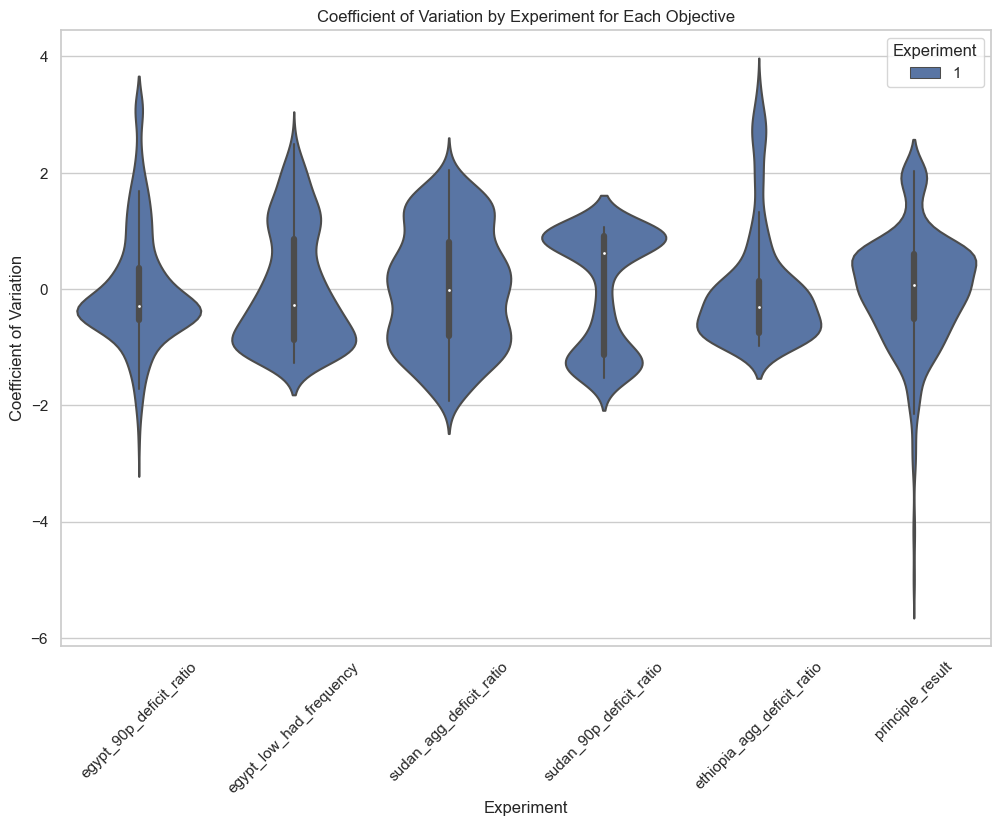

In [90]:
# Create a boxplot using seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.violinplot(x='Objective', y='Coefficient of Variation', hue='Experiment', data=melted_df)
plt.title('Coefficient of Variation by Experiment for Each Objective')
plt.xlabel('Experiment')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45)
plt.show()